In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [236]:
rawData = pd.read_csv("dataset/athlete_events.csv")

rawData.describe()

rawData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [237]:
# Données qu'on considère comme ne pouvant pas être null à cause :
# **Du non sens physique**
# - Age
# - Height
# - Weight
# - Sex
# **Pour les besoins du process de traitement**
# - Sport
#
# Au contraire ce que qui peut rester null :
# - Medal

In [238]:
rawData.isnull()

print("Taille pré nettoyage :" + str(len(rawData)))
clearData = rawData[(rawData["Height"].isnull() == False) & \
                    (rawData["Age"].isnull() == False) & \
                    (rawData["Weight"].isnull() == False) & \
                    (rawData["Sex"].isnull() == False) & \
                    (rawData["Sport"].isnull() == False)
                    ]
clearData = clearData.drop_duplicates()
print("Taille post nettoyage :" + str(len(clearData)))
print("Il y'a donc une perte de " + str(len(rawData) - len(clearData)))
clearData.head()

Taille pré nettoyage :271116
Taille post nettoyage :206152
Il y'a donc une perte de 64964


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [239]:
# Normalisation des données

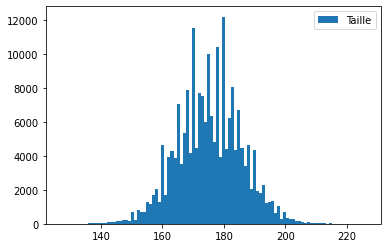

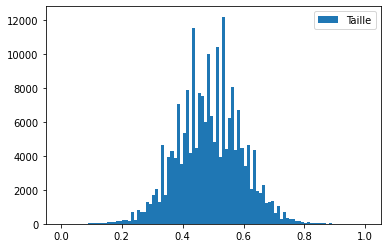

In [240]:
plt.hist(clearData["Height"], bins=100, label=['Taille'])
plt.legend(loc="upper right")
plt.show()

#normalisation de la taille 
clearData["Height"]=((clearData["Height"]-clearData["Height"].min())/(clearData["Height"].max()-clearData["Height"].min()))*1

plt.hist(clearData["Height"], bins=100, label=['Taille'])
plt.legend(loc="upper right")
plt.show()

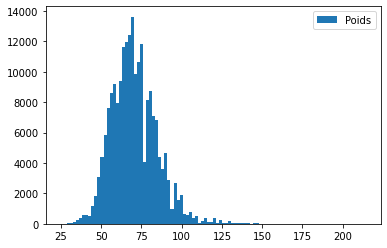

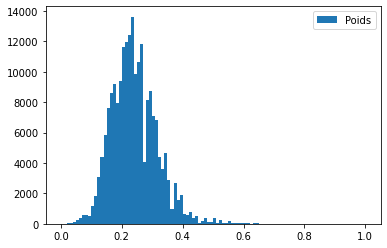

In [241]:
plt.hist(clearData["Weight"], bins=100, label=['Poids'])
plt.legend(loc="upper right")
plt.show()

#normalisation du poids 
clearData["Weight"]=((clearData["Weight"]-clearData["Weight"].min())/(clearData["Weight"].max()-clearData["Weight"].min()))*1

plt.hist(clearData["Weight"], bins=100, label=['Poids'])
plt.legend(loc="upper right")
plt.show()

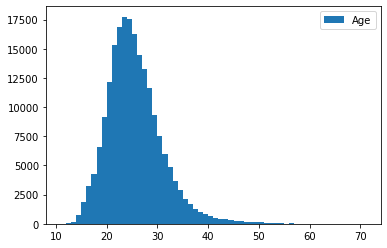

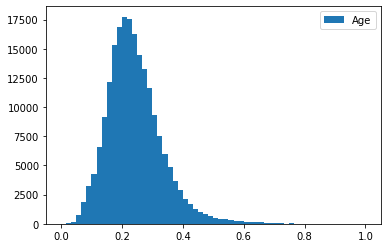

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,0.283333,0.575758,0.317460,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,0.233333,0.414141,0.291005,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,0.366667,0.414141,0.291005,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,0.283333,0.555556,0.301587,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,0.133333,0.444444,0.206349,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [242]:
plt.hist(clearData["Age"], bins=60, label=['Age'])
plt.legend(loc="upper right")
plt.show()

#normalisation de l'age 
clearData["Age"]=((clearData["Age"]-clearData["Age"].min())/(clearData["Age"].max()-clearData["Age"].min()))*1

plt.hist(clearData["Age"], bins=60, label=['Age'])
plt.legend(loc="upper right")
plt.show()

clearData.loc[(clearData["Medal"].isnull() == False)] 


In [243]:
clearData.loc[(clearData["Medal"].isnull() == False), 'Medal'] = 1
clearData.loc[(clearData["Sex"]== "M"), 'Sex'] = 1
clearData.loc[(clearData["Sex"]== "F"), 'Sex'] = 0


# clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0



# clearData.loc[(rawData["Medal"] != 0), 'Medal'] = 1


clearData[(clearData["Medal"]==1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,1,0.283333,0.575758,0.317460,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1
41,17,Paavo Johannes Aaltonen,1,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1
42,17,Paavo Johannes Aaltonen,1,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,1
44,17,Paavo Johannes Aaltonen,1,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,1
48,17,Paavo Johannes Aaltonen,1,0.283333,0.484848,0.206349,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),0,0.233333,0.414141,0.291005,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,1
271080,135553,Galina Ivanovna Zybina (-Fyodorova),0,0.366667,0.414141,0.291005,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,1
271082,135554,Bogusaw Zych,1,0.283333,0.555556,0.301587,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",1
271102,135563,Olesya Nikolayevna Zykina,0,0.133333,0.444444,0.206349,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,1


In [244]:
# cor = clearData.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0

clearData[(clearData["Medal"]==0)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,0.216667,0.535354,0.291005,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,1,0.200000,0.434343,0.185185,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,0,0.166667,0.585859,0.301587,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,0,0.166667,0.585859,0.301587,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,0,0.233333,0.585859,0.301587,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,1,0.300000,0.525253,0.338624,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,1,0.266667,0.494949,0.179894,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,1,0.266667,0.494949,0.179894,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,1,0.316667,0.585859,0.375661,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0
